In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_1 = pd.read_excel(r"C:/Users/sindh/OneDrive/Desktop/Projects/Industrial_copper_modeling/Copper_Set.xlsx")
data_1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
data_1.shape

(181673, 14)

In [4]:
data_1.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
# dealing with data_1 in wrong format
# for categorical variables, this step is ignored
# data_1 = data_1[data_1['status'].isin(['Won', 'Lost'])]
data_1['item_date'] = pd.to_datetime(data_1['item_date'], format='%Y%m%d', errors='coerce').dt.date
data_1['quantity tons'] = pd.to_numeric(data_1['quantity tons'], errors='coerce')
data_1['customer'] = pd.to_numeric(data_1['customer'], errors='coerce')
data_1['country'] = pd.to_numeric(data_1['country'], errors='coerce')
data_1['application'] = pd.to_numeric(data_1['application'], errors='coerce')
data_1['thickness'] = pd.to_numeric(data_1['thickness'], errors='coerce')
data_1['width'] = pd.to_numeric(data_1['width'], errors='coerce')
data_1['material_ref'] = data_1['material_ref'].str.lstrip('0')
data_1['product_ref'] = pd.to_numeric(data_1['product_ref'], errors='coerce')
data_1['delivery date'] = pd.to_datetime(data_1['delivery date'], format='%Y%m%d', errors='coerce').dt.date
data_1['selling_price'] = pd.to_numeric(data_1['selling_price'], errors='coerce')

In [7]:
# material_ref has large set of null values, so replacing them with unknown 
data_1['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data_1 which can be neglected
data_1 = data_1.dropna()

In [8]:
data_1.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [9]:
data_1.shape

(181631, 14)

In [10]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181631.0,5.876231e+03,2.349346e+06,-2000.00,1.096801e+01,3.036395e+01,6.716187e+01,1.000000e+09
customer,181631.0,3.023251e+07,1.005626e+05,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,3.040818e+07
country,181631.0,4.489320e+01,2.440430e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181631.0,2.561597e+01,1.775382e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181631.0,2.564198e+00,6.572637e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181631.0,1.295267e+03,2.616441e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181631.0,4.740398e+08,7.175426e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181631.0,1.918367e+03,3.318331e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [11]:
data_1_1 = data_1.copy()

In [12]:
def skewplot(data_1, column):
    plt.figure(figsize=(20, 4))

    #Dist Plot
    if pd.api.types.is_numeric_dtype(data_1[column]):  # Check if numerical
      plt.subplot(1, 3, 1)
      sns.distplot(data_1[column], kde=True)
      plt.title("Distplot for " + column)
    else:
      print("Skipping", column, "as it's not numerical")


    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(data_1[column])
    plt.title("Box plot for " + column)

    # Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(data_1[column])
    plt.title("Violin plot for " + column)

    plt.tight_layout()
    plt.show()

In [13]:
skewed_col=['quantity tons', 'customer', 'country',
               'application', 'thickness', 'width',
                'selling_price']

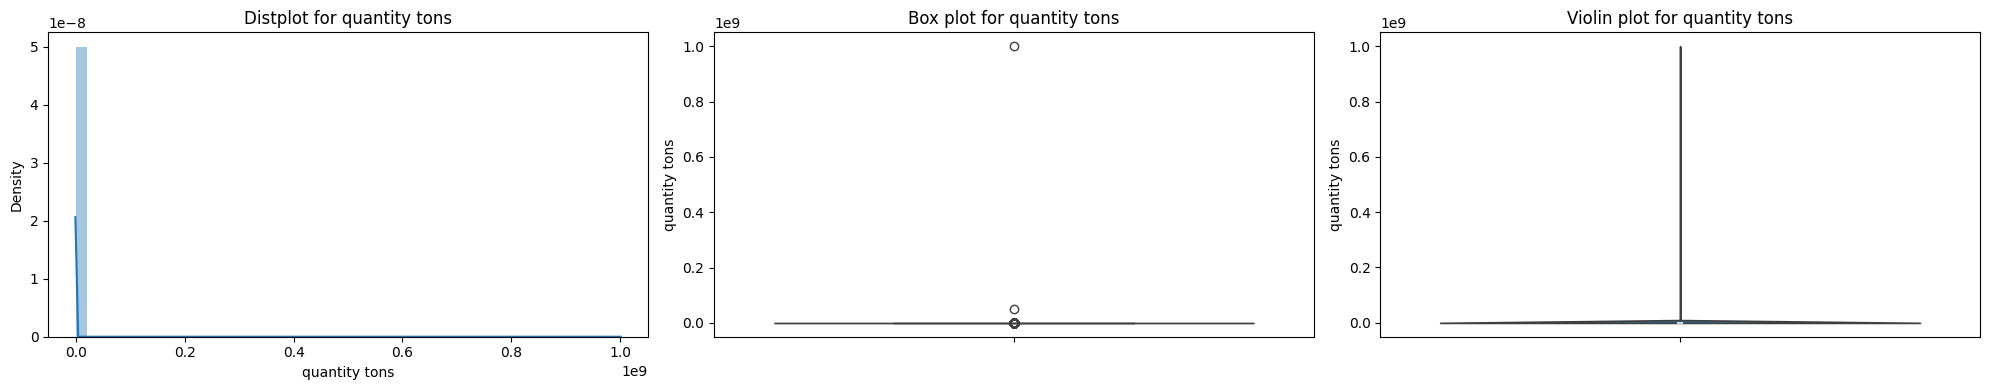

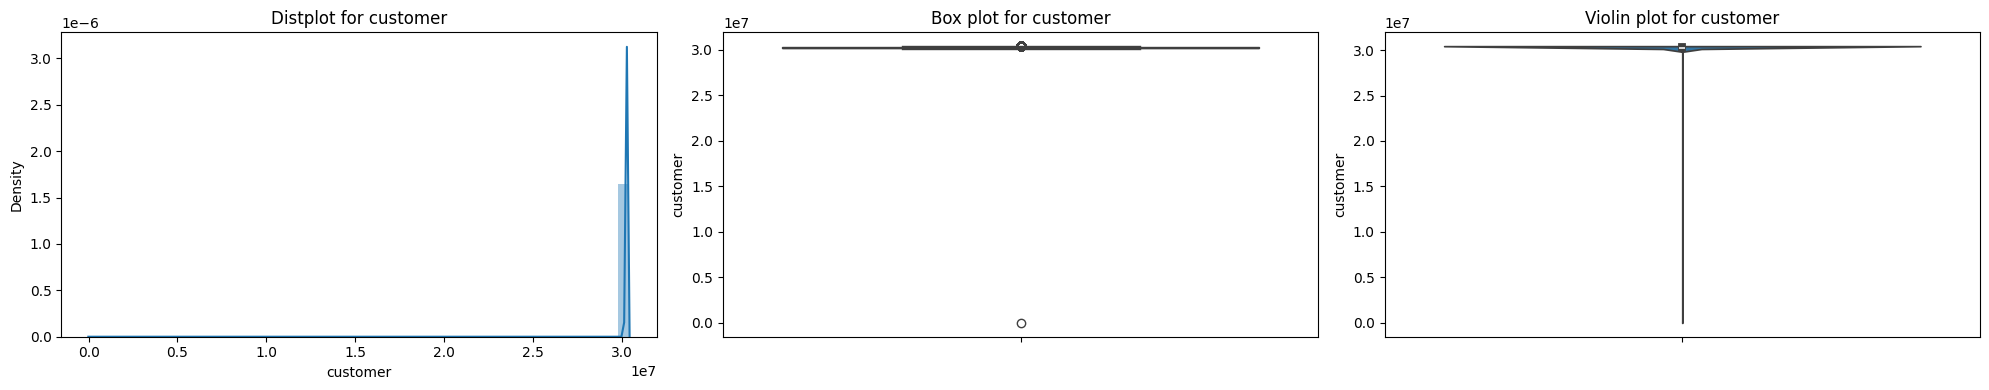

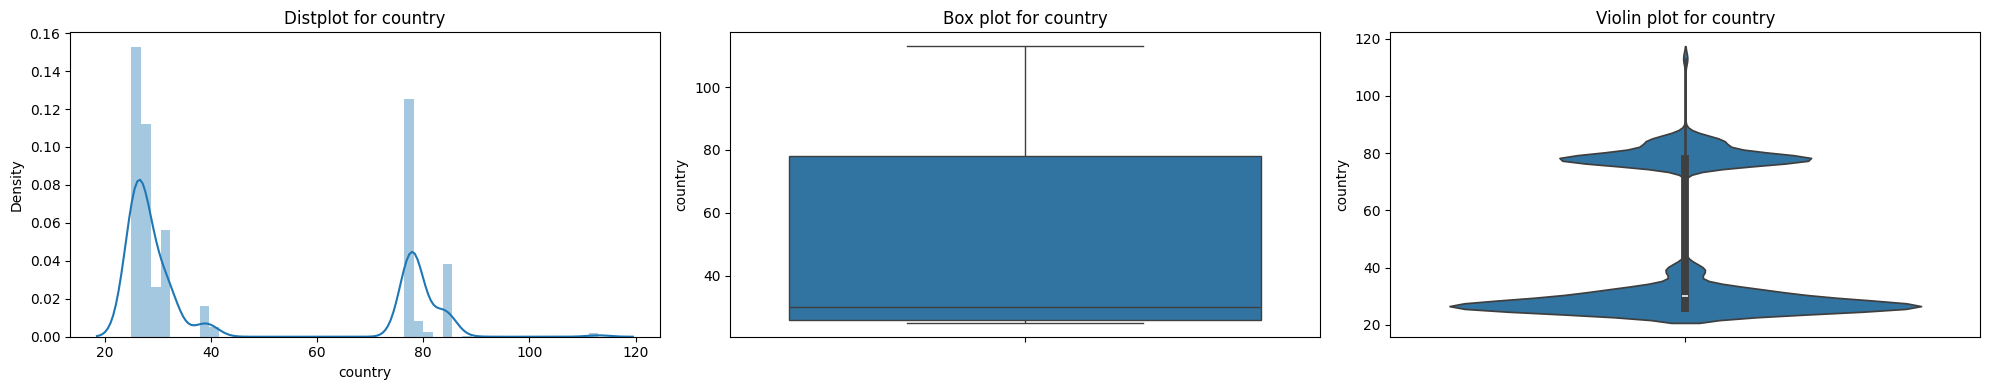

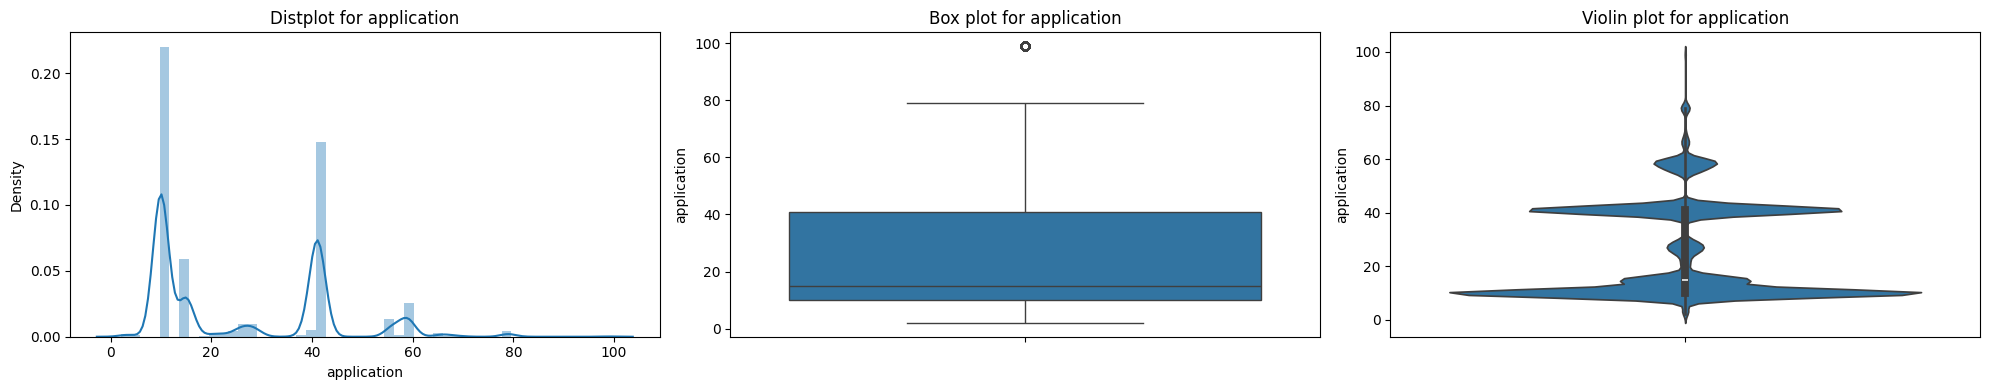

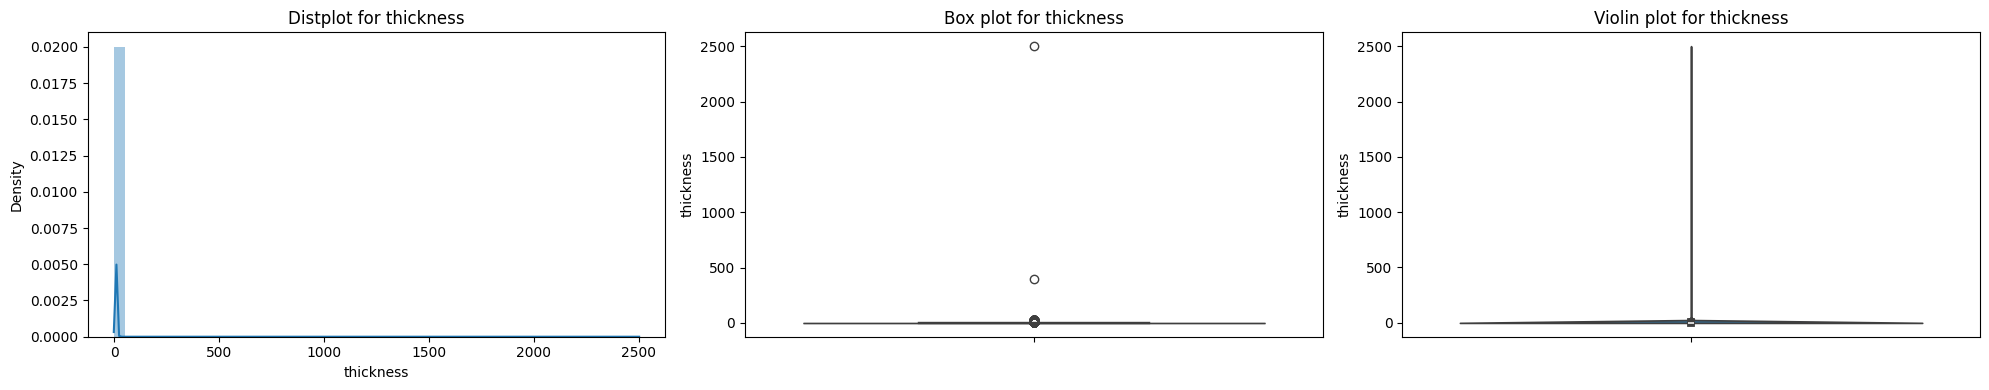

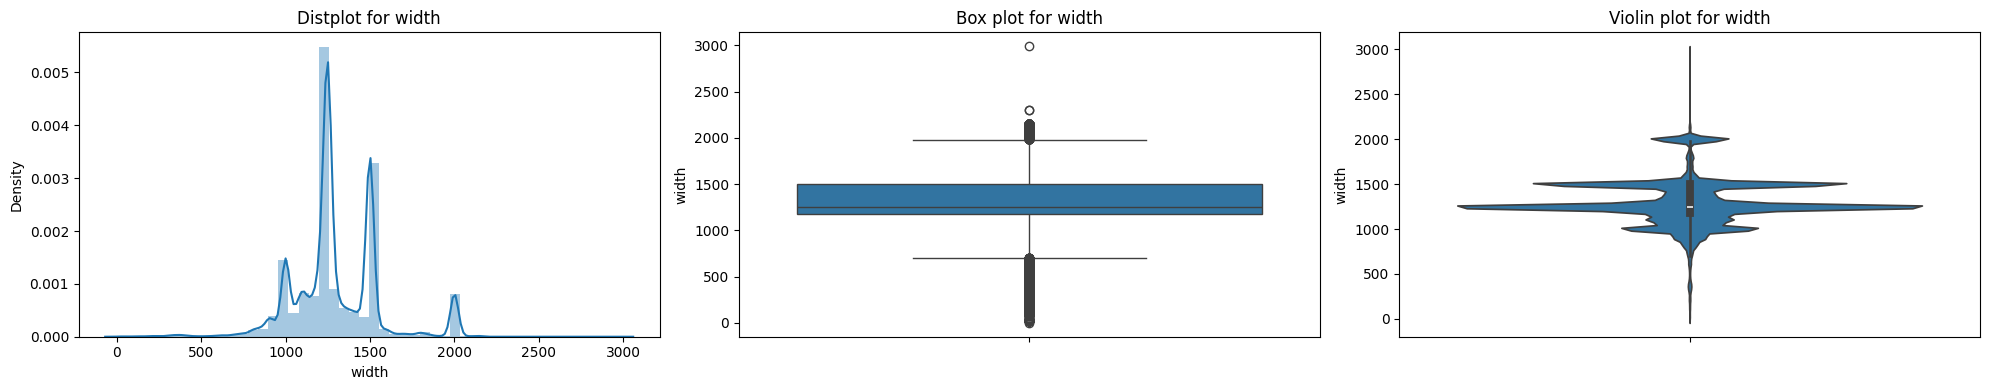

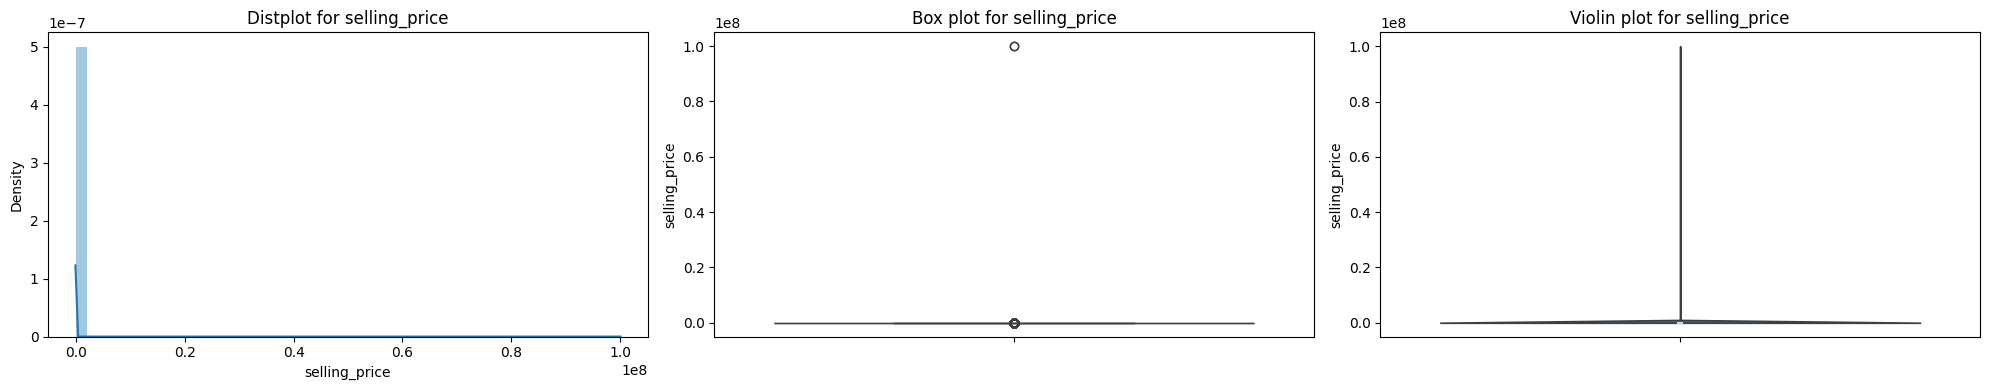

In [14]:
for i in skewed_col:
  skewplot(data_1,i)

In [15]:
mask1 = data_1['selling_price'] <= 0
print(mask1.sum())
data_1.loc[mask1, 'selling_price'] = np.nan

mask1 = data_1['quantity tons'] <= 0
print(mask1.sum())
data_1.loc[mask1, 'quantity tons'] = np.nan

mask1 = data_1['thickness'] <= 0
print(mask1.sum())

7
4
0


In [16]:
data_1.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [17]:
data_1.dropna(inplace=True)
len(data_1)

181620

In [18]:

def apply_log(column):
    # Log transformation requires positive values, so shift the data if necessary
    shift = 0
    if (data_1[column] <= 0).any():
        shift = abs(data_1[column].min()) + 1

    transformed_data = np.log(data_1[column] + shift)
    return transformed_data, shift

# Apply log transformation
data_1['quantity_tons_log'], quantity_tons_shift = apply_log('quantity tons')
data_1['width_log'], width_shift = apply_log('width')
data_1['thickness_log'], thickness_shift = apply_log('thickness')
data_1['selling_price_log'], selling_price_shift = apply_log('selling_price')

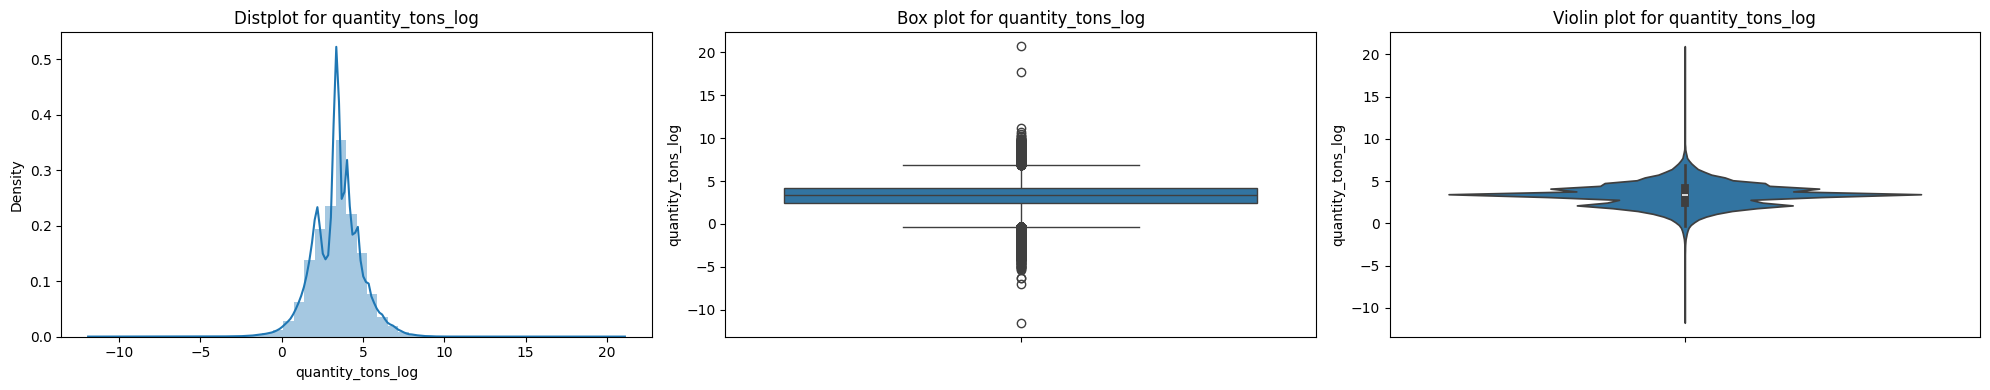

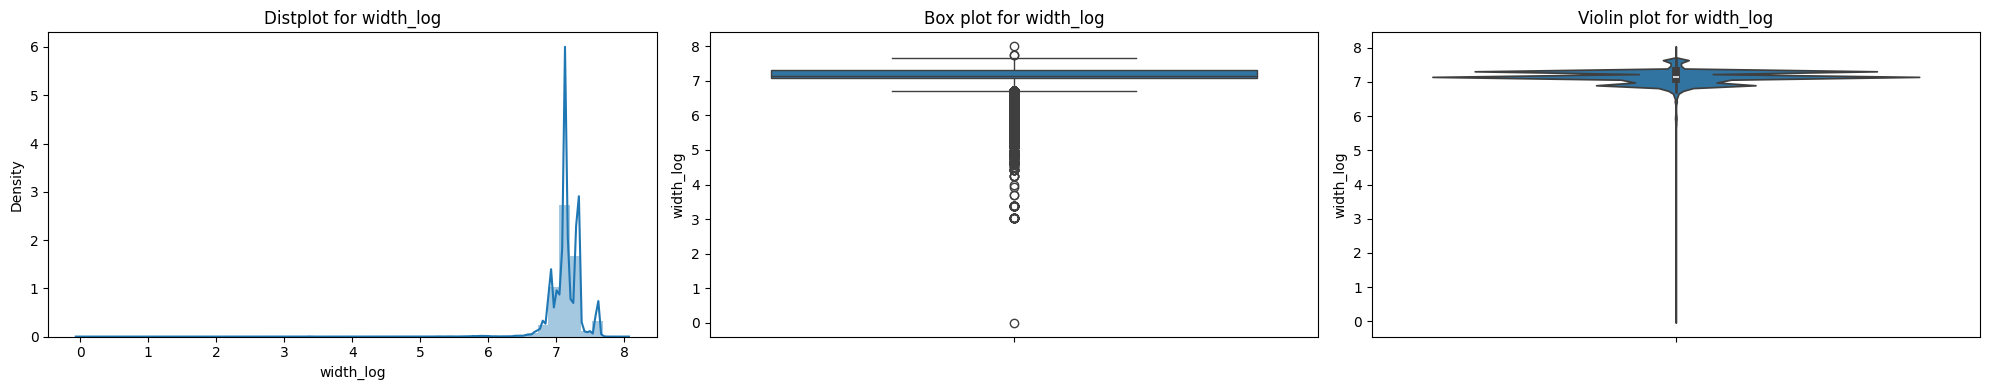

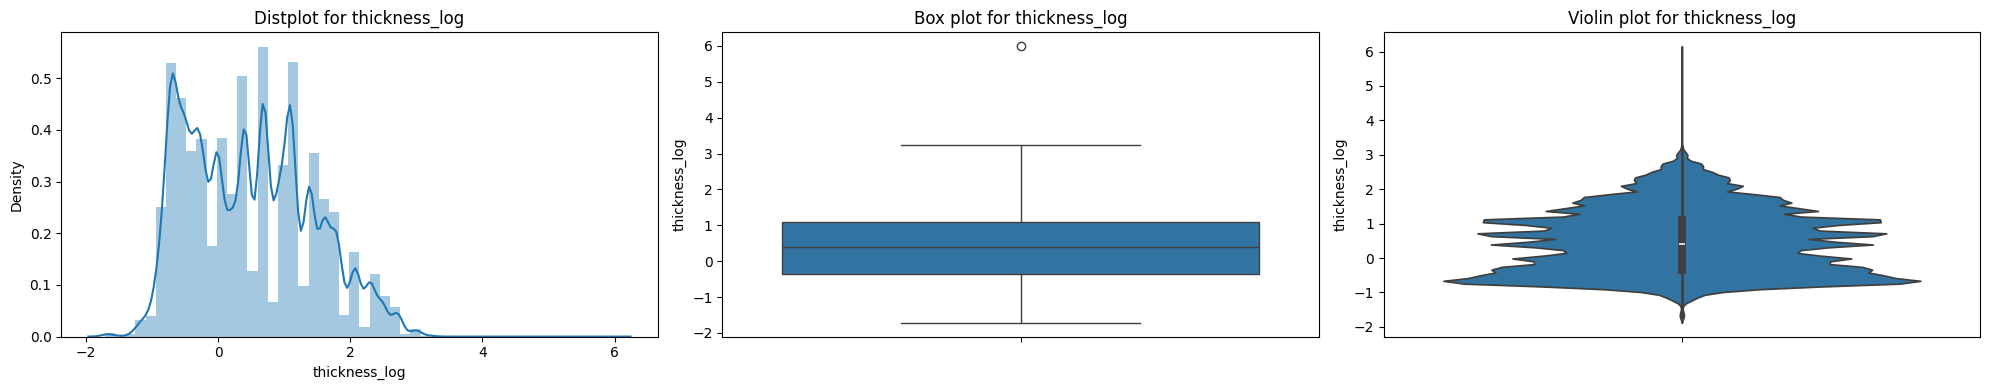

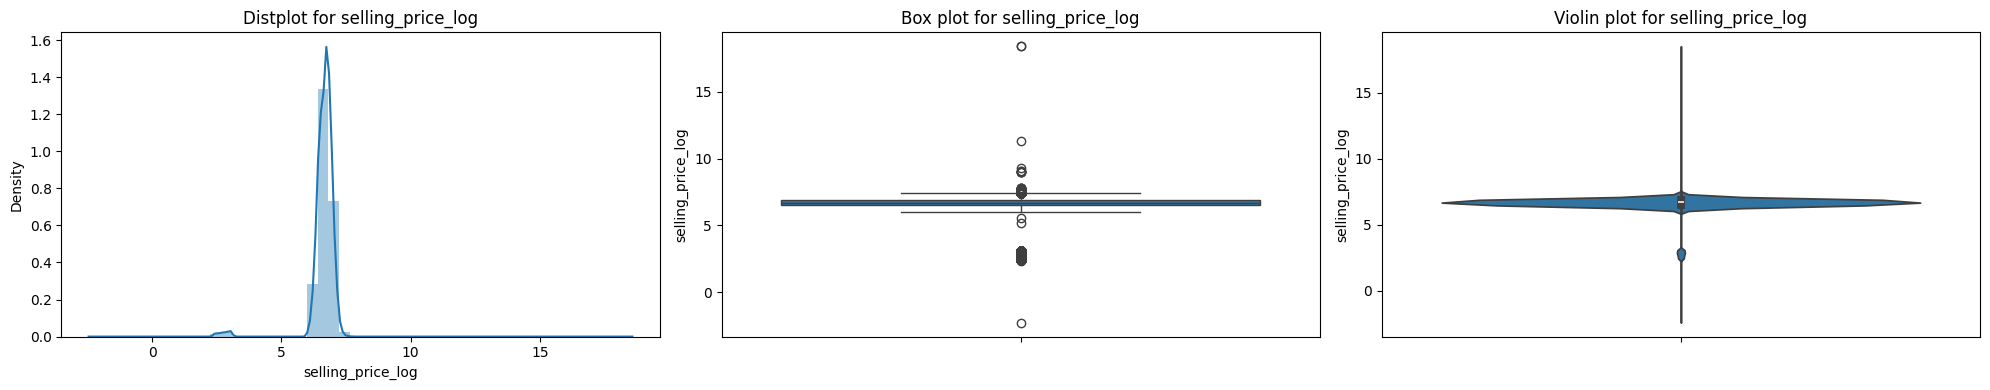

In [19]:
skwed_col_2=["quantity_tons_log","width_log","thickness_log","selling_price_log"]
for i in skwed_col_2:
  skewplot(data_1,i)

In [20]:
data_1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity_tons_log,width_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,7.313220,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,7.098376,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,6.858565,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,7.183112,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,7.600902,1.386294,6.357842


In [21]:
data_1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'quantity_tons_log',
       'width_log', 'thickness_log', 'selling_price_log'],
      dtype='object')

In [22]:
a = data_1[['quantity_tons_log', 'application', 'thickness_log', 'width', 'selling_price_log', 'country', 'customer', 'product_ref']].corr()

<Axes: >

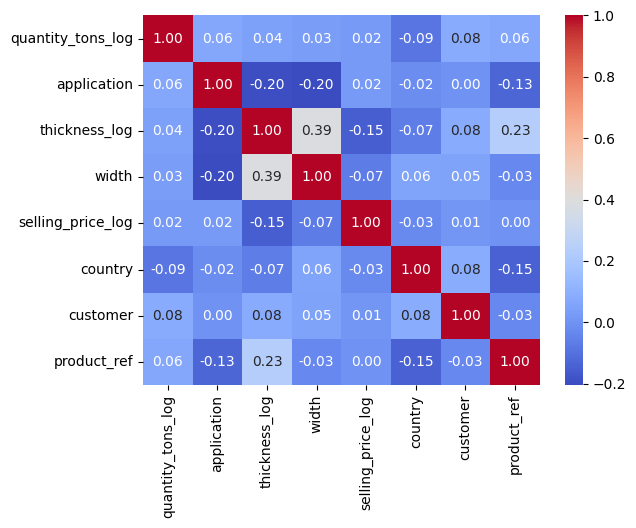

In [23]:
sns.heatmap(a, fmt='.2f', annot=True, cmap="coolwarm")

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [25]:
data_1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'quantity_tons_log',
       'width_log', 'thickness_log', 'selling_price_log'],
      dtype='object')

In [26]:
X = data_1[['quantity_tons_log', 'status', 'item type', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']]
y = data_1['selling_price_log']

# Encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
X_ohe = ohe.fit_transform(X[['item type']]).toarray()

ohe2 = OneHotEncoder(handle_unknown='ignore')
X_be = ohe2.fit_transform(X[['status']]).toarray()

# Independent features after encoding
X = np.concatenate((X[['quantity_tons_log', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']].values, X_ohe, X_be), axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Decision tree
dtr = DecisionTreeRegressor()

# Hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# GridSearchCV
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)

print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean squared error: 0.028341427204663067
R-squared: 0.9120298664925025


In [27]:
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [908.74965278]


In [28]:
# Saving the model
import pickle
with open('R_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('R_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('R_type.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('R_status.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [29]:
len(data_1)

181620

In [30]:
data_1.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity_tons_log,width_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,3.991779,7.313220,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,104991,1668701718,2021-04-01,1047.0,6.643822,7.098376,-0.223144,6.953684


In [31]:
#C
data_2 = data_1[data_1['status'].isin(['Won', 'Lost'])]
len(data_2)

150427

In [32]:
data_2.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'quantity_tons_log',
       'width_log', 'thickness_log', 'selling_price_log'],
      dtype='object')

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

X = data_2[['quantity_tons_log', 'selling_price_log', 'item type', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']]
Y = data_2['status']

# Encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
X_ohe = ohe.fit_transform(X[['item type']]).toarray()

be = LabelBinarizer()
y = be.fit_transform(Y)

# Independent features after encoding
X = np.concatenate((X[['quantity_tons_log', 'selling_price_log', 'application', 'thickness_log', 'width', 'country', 'customer', 'product_ref']].values, X_ohe), axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9110217376853021
Confusion Matrix:
[[ 5663  1339]
 [ 1338 21746]]


Confusion Matrix:
[[ 5663  1339]
 [ 1338 21746]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7002
           1       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



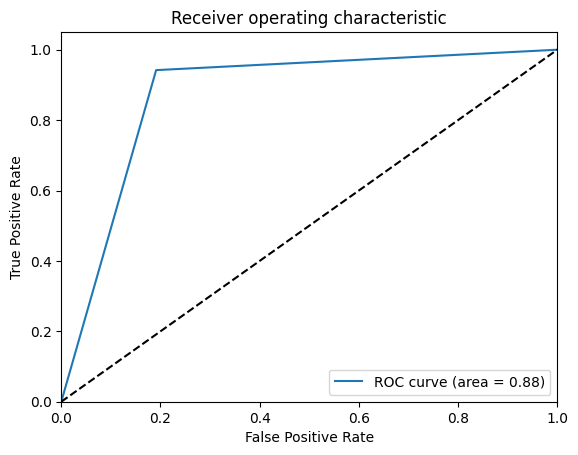

In [34]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [35]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Lost


In [36]:
# Saving the model
import pickle
with open('C_model.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('C_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('C_type.pkl', 'wb') as f:
    pickle.dump(ohe, f)